In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

direction = 'up'

### Display chromosome

- Chromosomes that do not plot the extracted genes are not displayed in the Circos plot.

In [3]:
combined_df_score = pd.read_csv(f"../data/circos_up_MR_2312/combined_position_{direction}.tsv", sep='\t')
combined_df_score.sort_values(by=['Chromosome/scaffold name', 'Gene start (bp)'], inplace=True)

# Create list of unique chromosome/scaffold name
unique_chromosomes = combined_df_score['Chromosome/scaffold name'].unique()

display(combined_df_score)

Gene stable ID Chromosome/scaffold name  HN-score(HN5) organism  \
58   ENSMUSG00000026073                      M_1             22    mouse   
55   ENSMUSG00000073676                      M_1             22    mouse   
177  ENSMUSG00000090165                      M_1             14    mouse   
227  ENSMUSG00000048126                      M_1             13    mouse   
112  ENSMUSG00000016529                      M_1             17    mouse   
..                  ...                      ...            ...      ...   
319        Os09g0494500                      R_9             98     rice   
432        Os09g0515550                      R_9             61     rice   
515        Os09g0526600                      R_9             52     rice   
422        Os09g0526650                      R_9             62     rice   
483        Os09g0558900                      R_9             55     rice   

     Gene start (bp)  Gene end (bp)  
58        40113239.0     40164391.0  
55        55127291.0     55130466.0  
177       87983110.0     88146726.0  
227       90693645.0     90771693.0  
112      130947582.0    130952711.0  
..               ...            ...  
319       19158203.0     19159173.0  
432       20083070.0     20083372.0  
515       20591252.0     20595143.0  
422       20593763.0     20595047.0  
483       22212492.0     22218155.0  

[637 rows x 6 columns]

In [4]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_mouse.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'M_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'mouse'# assign the tag
df_subset = df_subset[df_subset['chr'].isin(unique_chromosomes)] #filter the chromosome when the gene is not plotted

# organism = "rice" 
df1 = pd.read_csv("../data/chromosome/chromosome_rice.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag
df1_subset = df1_subset[df1_subset['chr'].isin(unique_chromosomes)] #filter the chromosome when the gene is not plotted
combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)

display(combined_df)

chr  start        end organism
0    M_1      1  195154279    mouse
1    M_2      1  181755017    mouse
2    M_3      1  159745316    mouse
3    M_4      1  156860686    mouse
4    M_5      1  151758149    mouse
5    M_6      1  149588044    mouse
6    M_7      1  144995196    mouse
7    M_8      1  130127694    mouse
8    M_9      1  124359700    mouse
9   M_10      1  130530862    mouse
10  M_11      1  121973369    mouse
11  M_12      1  120092757    mouse
12  M_13      1  120883175    mouse
13  M_14      1  125139656    mouse
14  M_15      1  104073951    mouse
15  M_16      1   98008968    mouse
16  M_17      1   95294699    mouse
17  M_18      1   90720763    mouse
18  M_19      1   61420004    mouse
19   M_X      1  169476592    mouse
20   M_Y      1   91455967    mouse
21   R_1      1   43270923     rice
22   R_2      1   35937250     rice
23   R_3      1   36413819     rice
24   R_4      1   35502694     rice
25   R_5      1   29958434     rice
26   R_6      1   31248787     rice
27   R_7      1   29697621     rice
28   R_8      1   28443022     rice
29   R_9      1   23012720     rice
30  R_10      1   23207287     rice
31  R_11      1   29021106     rice
32  R_12      1   27531856     rice

In [9]:
# Initialize
circle = Gcircle(figsize=(20,20))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'mouse':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.2, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 2000x2000 with 0 Axes>

In [10]:
circle.set_garcs(0,360)

In [11]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

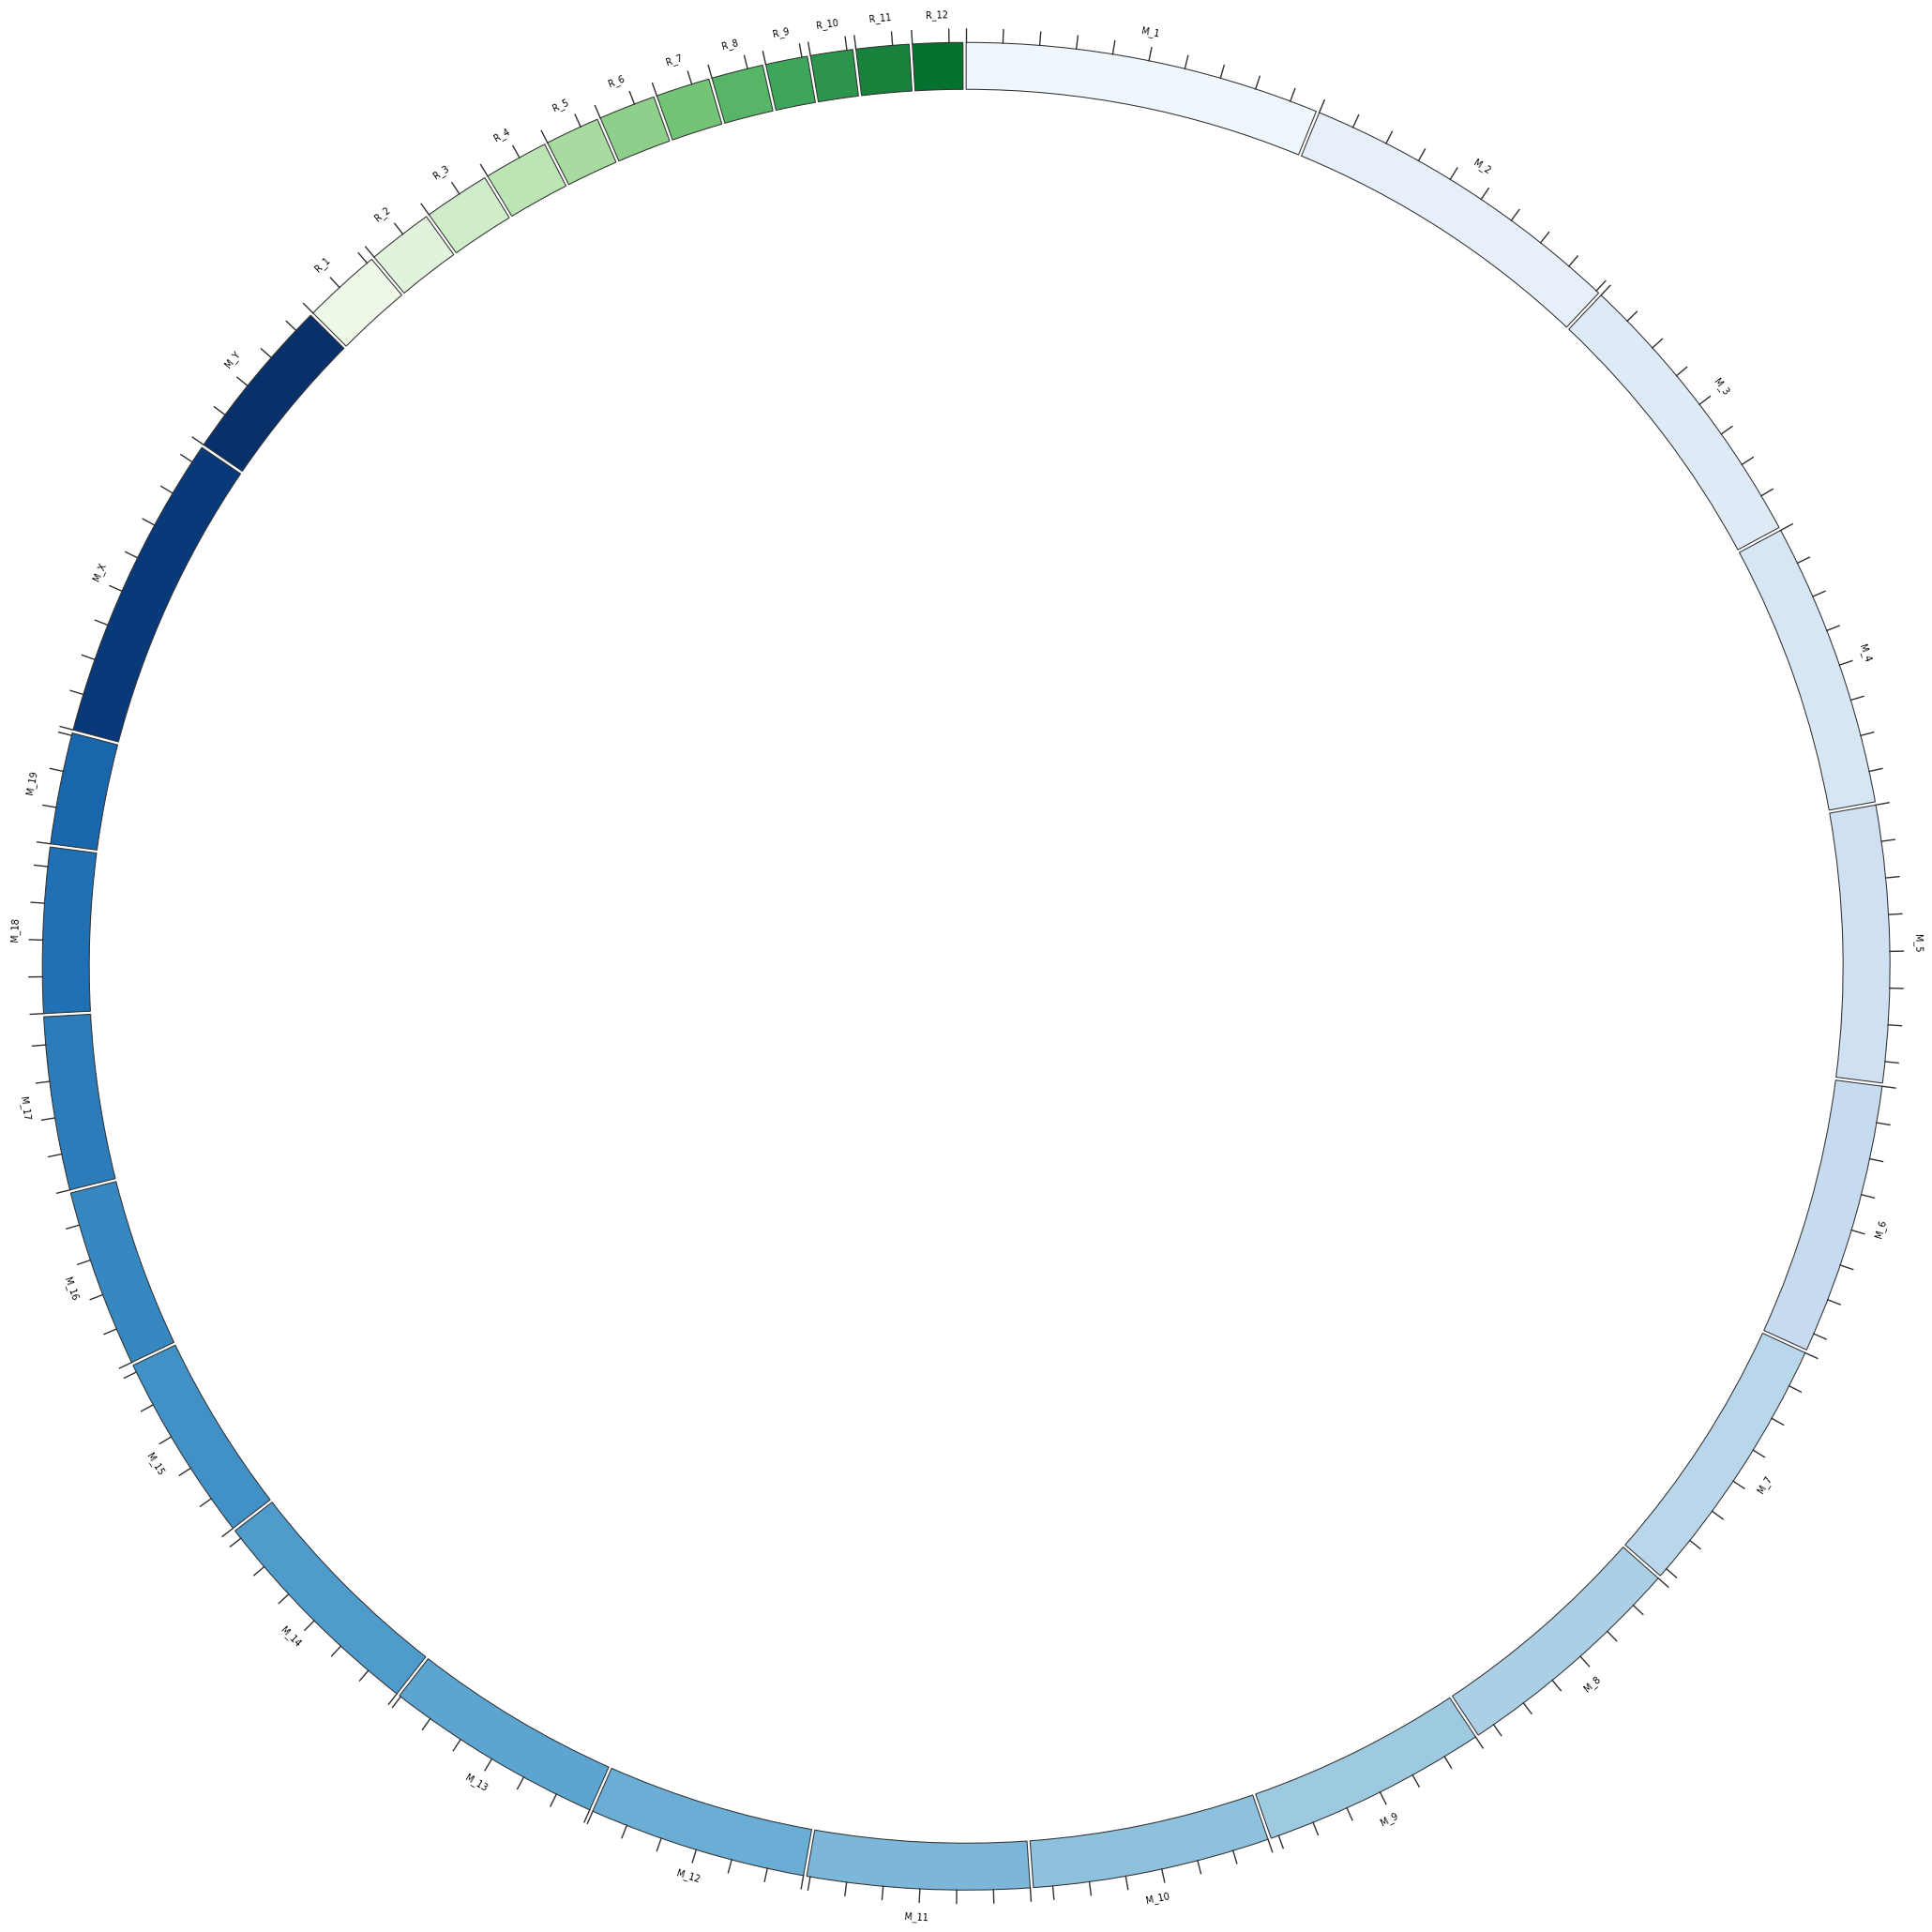

In [12]:
circle.figure

## Scatter plot of mouse vs rice upregulated genes

In [13]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

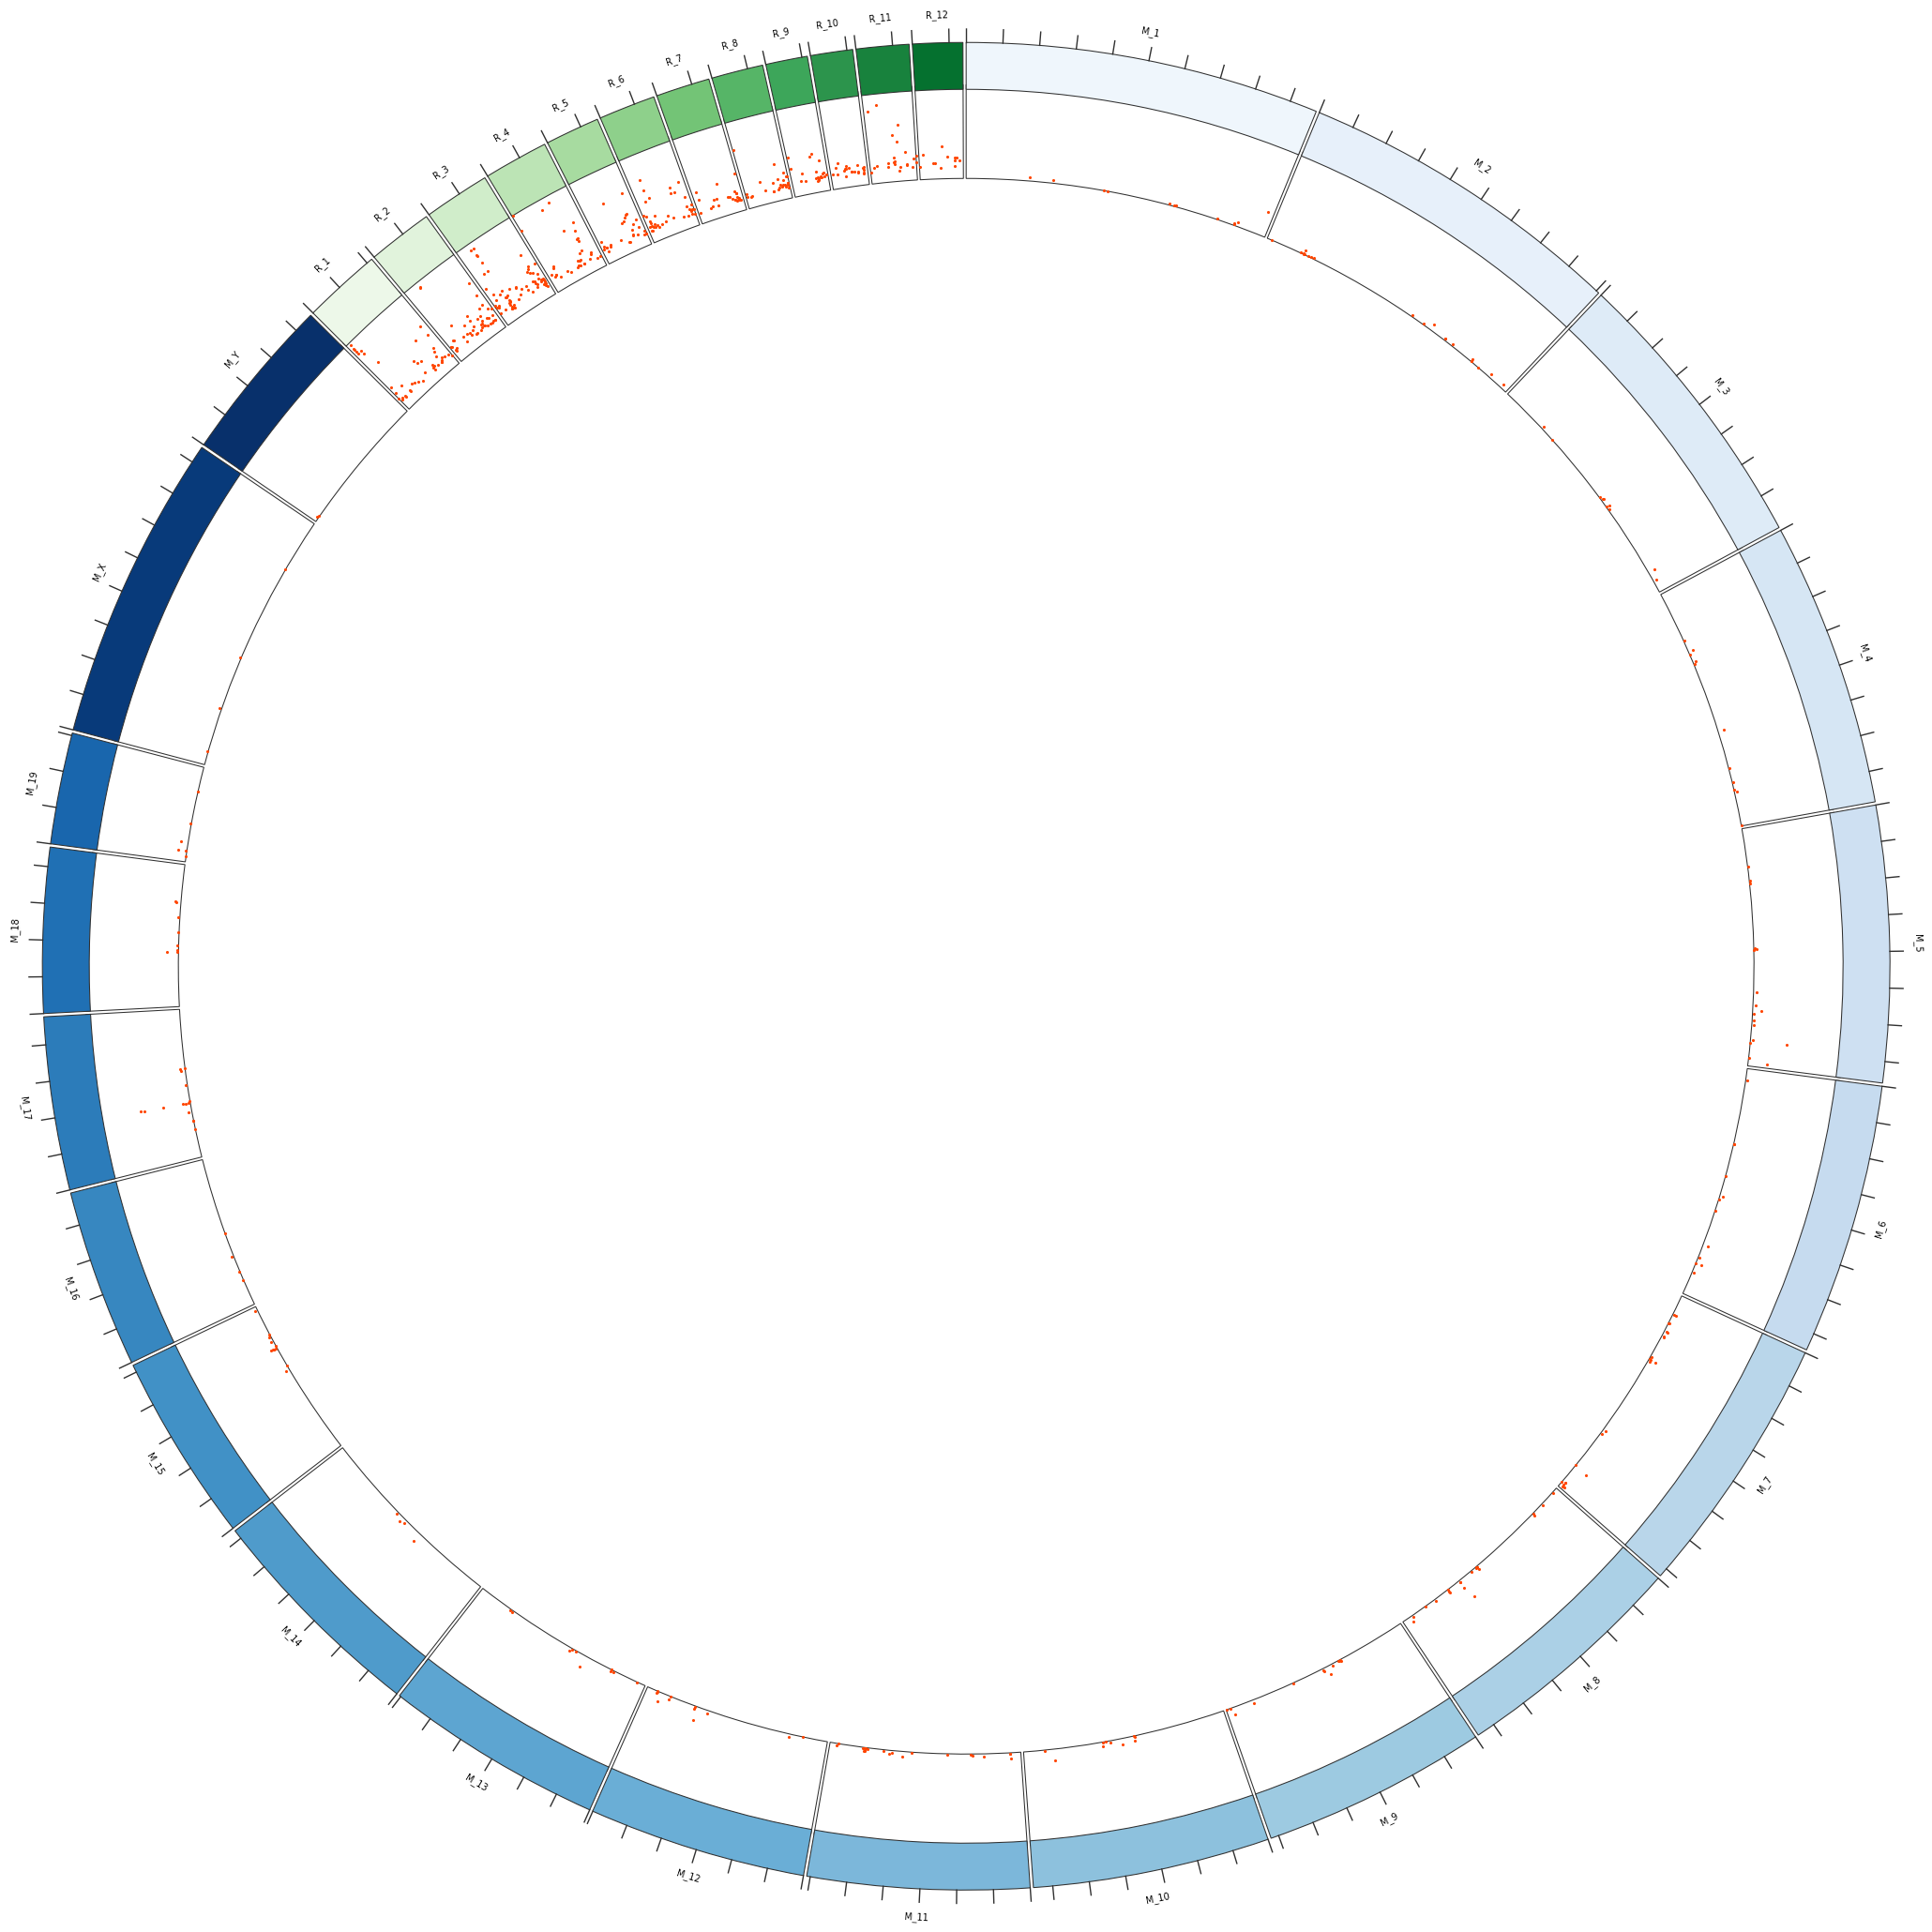

In [14]:
circle.figure

## linkplot of GOslim terms for human vs rice upregulated genes

In [15]:
merged_df_goslim_sorted = pd.read_csv("../data/circos_up_MR_2312/combined_goslim_enrichment_up.tsv", sep='\t')
display(merged_df_goslim_sorted)

GOSlim GOSlim GOA Accession(s)  \
0      GO:0008289: lipid binding              GO:0008289   
1      GO:0008289: lipid binding              GO:0008289   
2      GO:0008289: lipid binding              GO:0008289   
3      GO:0008289: lipid binding              GO:0008289   
4      GO:0008289: lipid binding              GO:0008289   
...                          ...                     ...   
16724    GO:0003723: RNA binding              GO:0003723   
16725    GO:0003723: RNA binding              GO:0003723   
16726    GO:0003723: RNA binding              GO:0003723   
16727    GO:0003723: RNA binding              GO:0003723   
16728    GO:0003723: RNA binding              GO:0003723   

      GOSlim GOA Description       GOSlim_domain Gene stable ID_rice  \
0              lipid binding  molecular_function        Os07g0659600   
1              lipid binding  molecular_function        Os07g0659600   
2              lipid binding  molecular_function        Os03g0111300   
3              lipid binding  molecular_function        Os07g0659600   
4              lipid binding  molecular_function        Os01g0849000   
...                      ...                 ...                 ...   
16724            RNA binding  molecular_function        Os02g0622500   
16725            RNA binding  molecular_function        Os01g0719400   
16726            RNA binding  molecular_function        Os10g0540800   
16727            RNA binding  molecular_function        Os02g0622500   
16728            RNA binding  molecular_function        Os06g0697200   

      Gene stable ID_mouse Chromosome/scaffold name_rice  start1 (bp)  \
0       ENSMUSG00000020437                           R_7     27800556   
1       ENSMUSG00000020178                           R_7     27800556   
2       ENSMUSG00000057933                           R_3       652323   
3       ENSMUSG00000037379                           R_7     27800556   
4       ENSMUSG00000037379                           R_1     36484020   
...                    ...                           ...          ...   
16724   ENSMUSG00000096520                           R_2     24783201   
16725   ENSMUSG00000053113                           R_1     29995196   
16726   ENSMUSG00000096520                          R_10     21091977   
16727   ENSMUSG00000053113                           R_2     24783201   
16728   ENSMUSG00000096520                           R_6     29163800   

       end1 (bp) Chromosome/scaffold name_mouse  start2 (bp)  end2 (bp)  \
0       27802446                           M_11      6456548    6470965   
1       27802446                           M_10     75152711   75170618   
2         652798                            M_9     78238300   78263070   
3       27802446                            M_5     33355528   33375799   
4       36484818                            M_5     33355528   33375799   
...          ...                            ...          ...        ...   
16724   24786542                            M_Y      3771673    3783267   
16725   29999996                           M_11    117856905  117860873   
16726   21096586                            M_Y      3771673    3783267   
16727   24786542                           M_11    117856905  117860873   
16728   29166676                            M_Y      3771673    3783267   

       HN-score(HN5)_rice  HN-score(HN5)_mouse  counts_up  fold_enrichment  \
0                      43                   29        147         6.247552   
1                      43                   17        147         6.247552   
2                      76                   13        147         6.247552   
3                      43                   14        147         6.247552   
4                      49                   14        147         6.247552   
...                   ...                  ...        ...              ...   
16724                  75                   15         50         0.178163   
16725                  51             

In [17]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

min_enrichment = merged_df_goslim_sorted['fold_enrichment'].min()
max_enrichment = merged_df_goslim_sorted['fold_enrichment'].max()
min_counts = merged_df_goslim_sorted[f'counts_{direction}'].min()
max_counts = merged_df_goslim_sorted[f'counts_{direction}'].max()

n_colors_above = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique())
n_colors_below = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique())

# Create color palette
red_palette = sns.color_palette("plasma", n_colors=n_colors_above)
blue_palette = sns.color_palette("crest", n_colors=n_colors_below)

def get_color (fold_enrichment, goslim_term, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return red_palette[index % n_colors_above]
    else:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return blue_palette[index % n_colors_below]

def get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                  min_linewidth_below, max_linewidth_below, 
                  min_linewidth_above, max_linewidth_above, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        return min_linewidth_above + (max_linewidth_above - min_linewidth_above) * normalized
    else:
        return min_linewidth_below + (max_linewidth_below - min_linewidth_below) * normalized
    
min_linewidth_below = 1 * 10**-4
max_linewidth_below = 1 * 10**-6
min_linewidth_above = 0.04
max_linewidth_above = 0.05


for index, row in merged_df_goslim_sorted.iterrows():
    ontology = row['GOSlim']
    fold_enrichment = row['fold_enrichment']
    counts_up = row[f'counts_{direction}']

    color = get_color(fold_enrichment, ontology)
    linewidth = get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                              min_linewidth_below, max_linewidth_below, 
                              min_linewidth_above, max_linewidth_above)
    name1 = row['Chromosome/scaffold name_rice'] # rice
    start1 = int(row['start1 (bp)'])
    end1 = int(row['end1 (bp)'])
    name2 = row['Chromosome/scaffold name_mouse'] # mouse
    start2 = int(row['start2 (bp)'])
    end2 = int(row['end2 (bp)'])

    source = (name1, start1, end1, 840)
    destination = (name2, start2, end2, 840)
    circle.chord_plot(source, 
                        destination, 
                        facecolor=color,
                        linewidth=linewidth,
                        edgecolor=color
    )

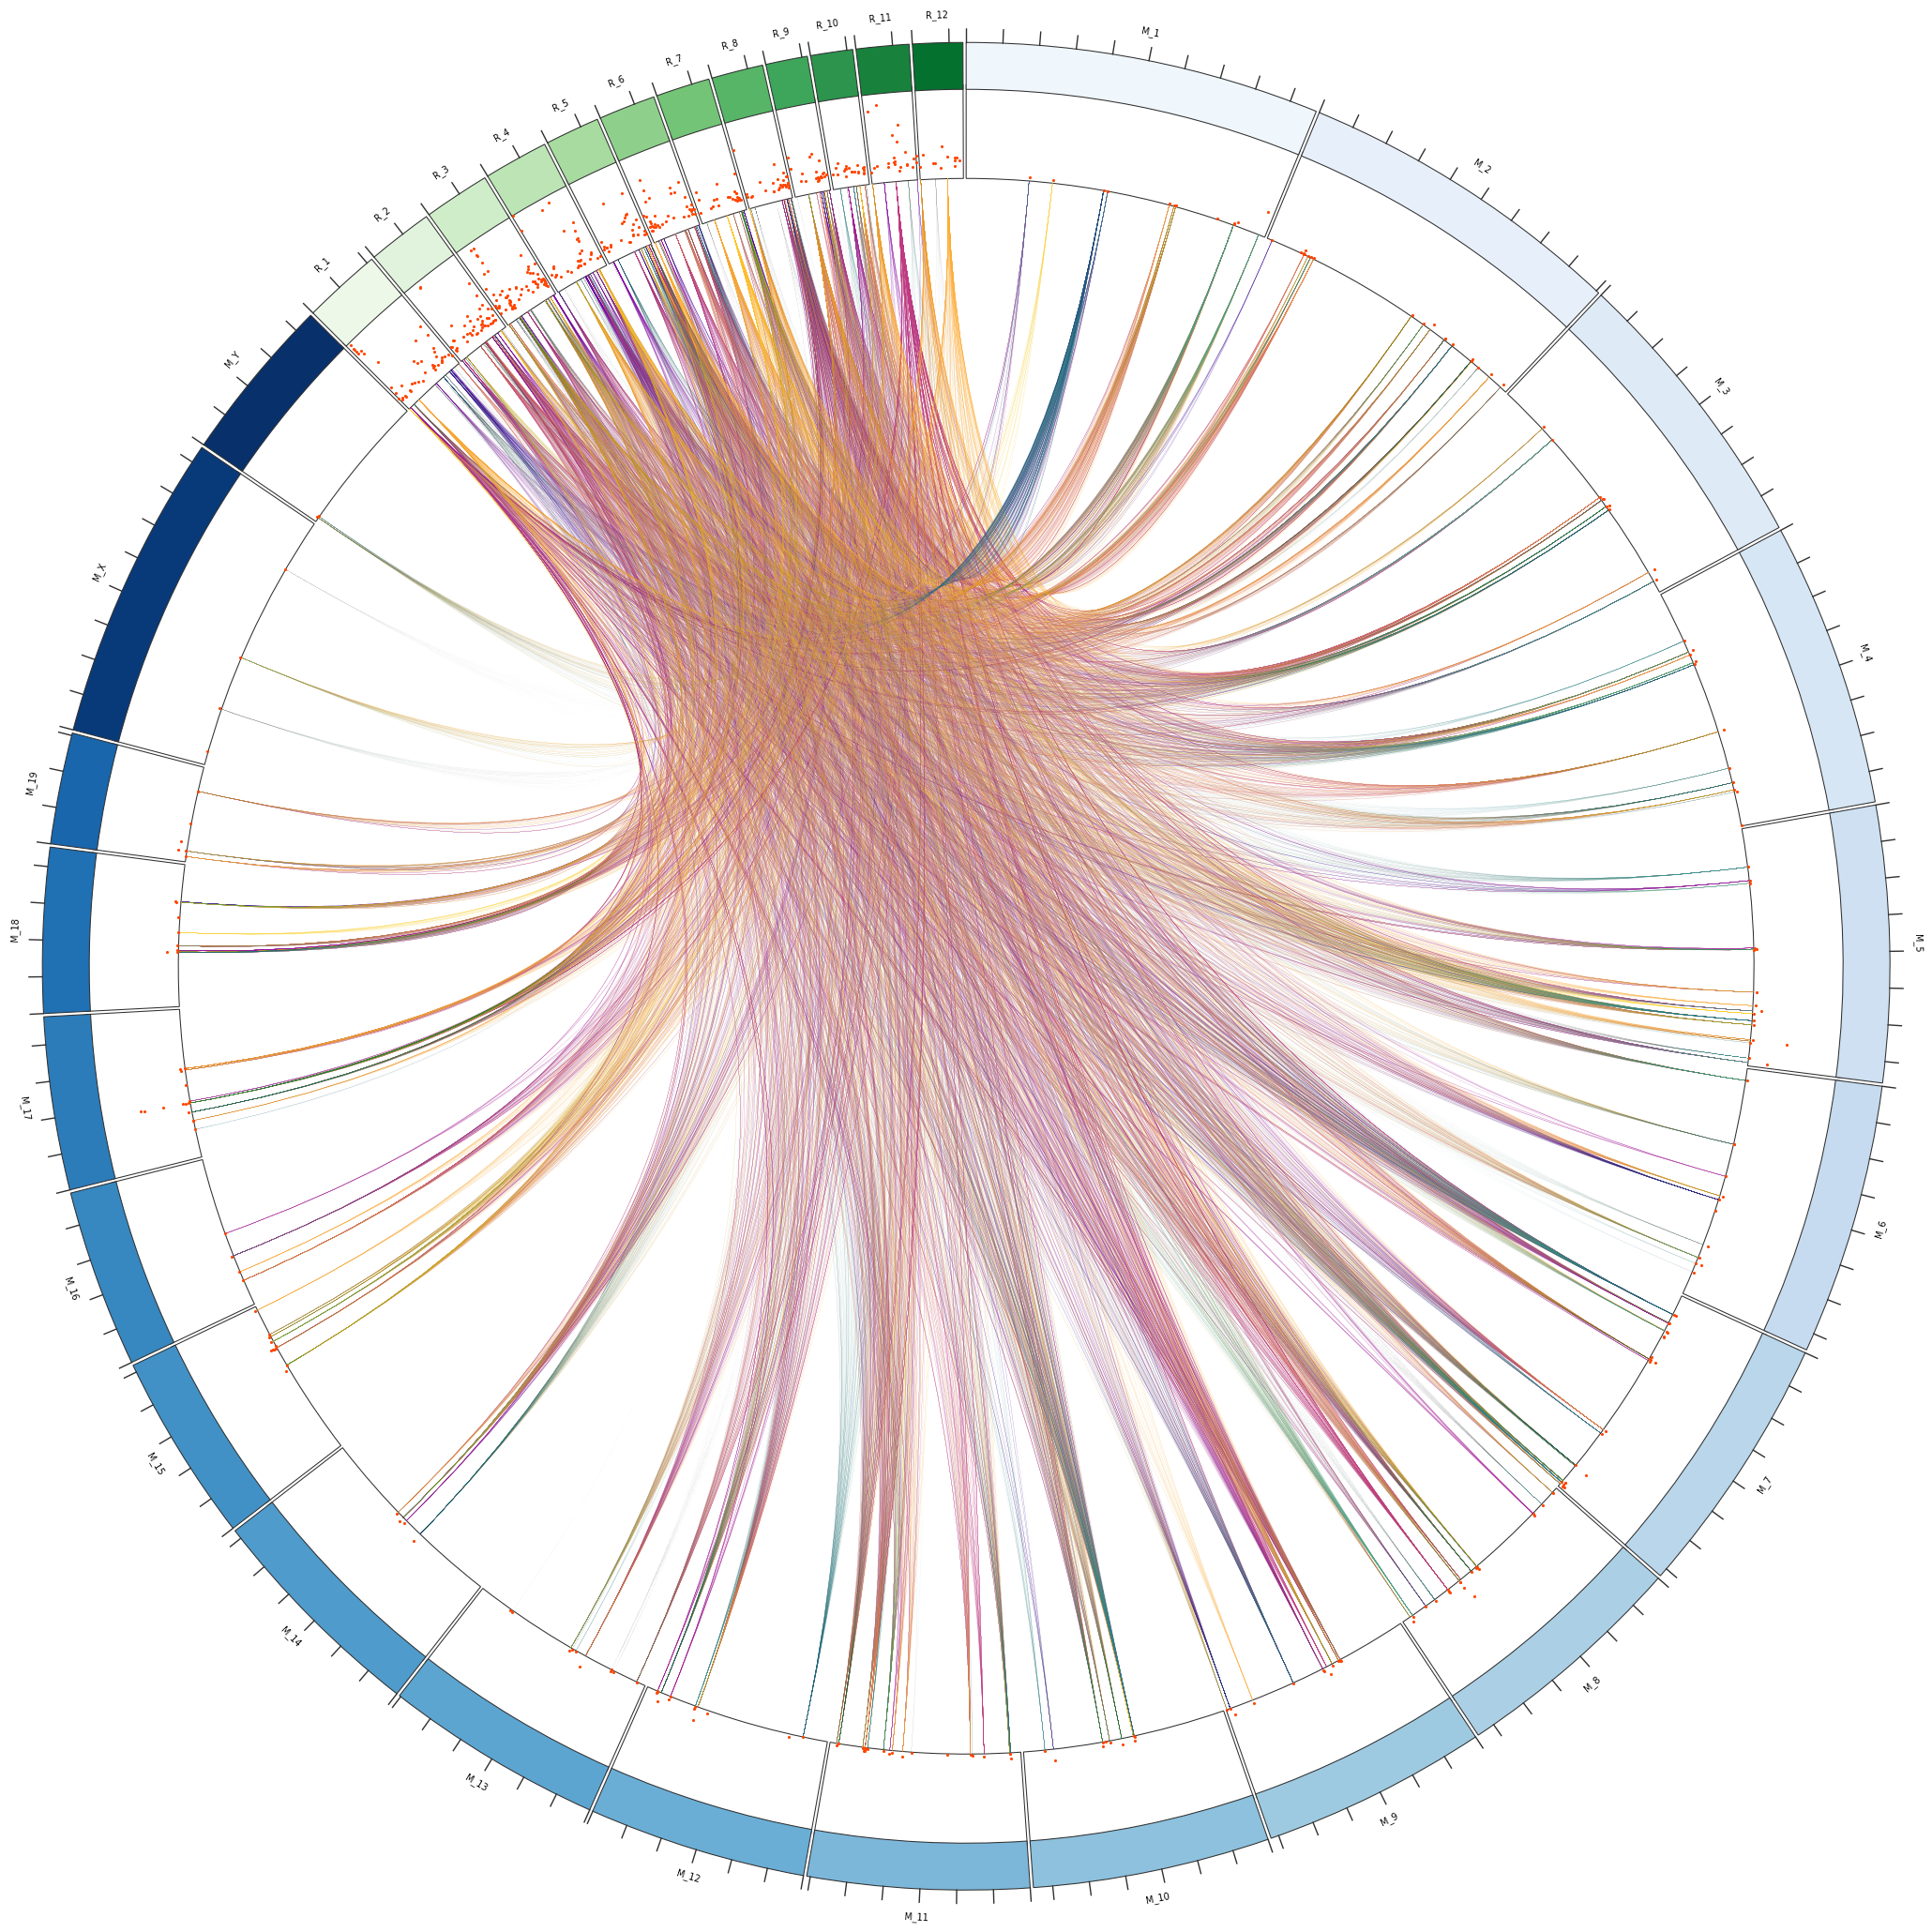

In [18]:
circle.figure

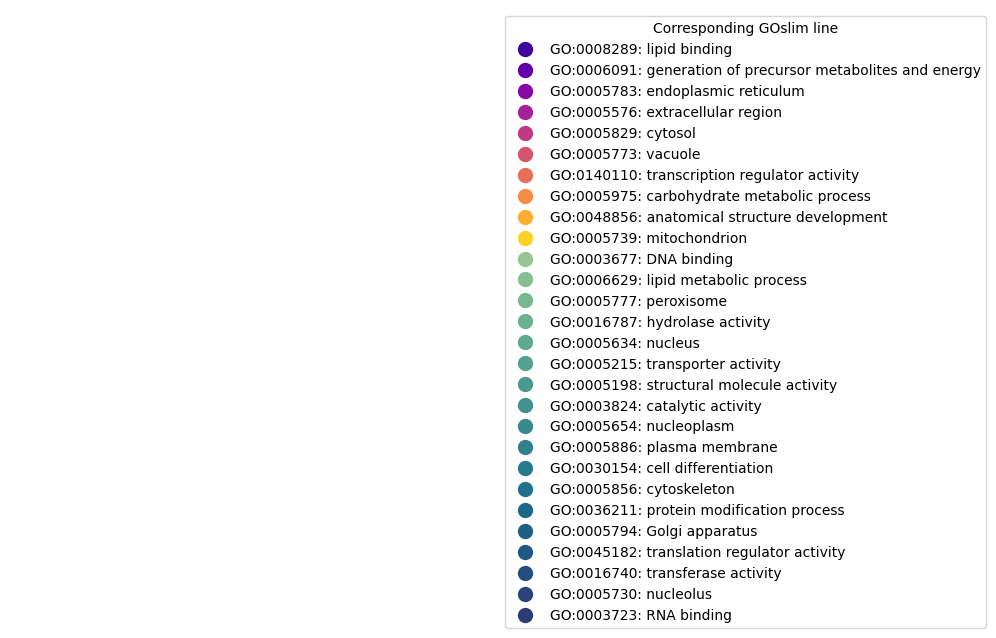

In [19]:
ontology_color_dict = {}
for ontology in merged_df_goslim_sorted['GOSlim'].unique():
    fold_enrichment = merged_df_goslim_sorted[merged_df_goslim_sorted['GOSlim'] == ontology]['fold_enrichment'].mean()
    ontology_color_dict[ontology] = get_color(fold_enrichment, ontology)

# 凡例の作成
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], 
            label=ontology, 
            color=color, 
            marker='o', 
            markersize=10, 
            linestyle='None')

ax.legend(title="Corresponding GOslim line", 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
ax.axis('off')
plt.show()
